# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [3]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death"


print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.06666666666666667
0.058823529411764705


In [4]:
d1 = "This is the first document."
d2 = "This is the second document."
d3 = "And this is the third one."

tiv = TfidfVectorizer()
corpus = [d1, d2, d3]
tfidf = tiv.fit_transform(corpus).toarray()

print(cosine_similarity(tfidf[0].reshape(1, -1), tfidf[1].reshape(1, -1))[0][0])
print(cosine_similarity(tfidf[0].reshape(1, -1), tfidf[2].reshape(1, -1))[0][0])
print(cosine_similarity(tfidf[1].reshape(1, -1), tfidf[2].reshape(1, -1))[0][0])

0.6190304384509513
0.32109840993087163
0.32109840993087163


## 한국어 형태소 분석기 설치

In [ ]:
!pip install konlpy

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
!pip uninstall -y mecab-python3 konlpy
!apt-get purge -y mecab libmecab-dev mecab-ipadic-utf8

In [ ]:
!apt-get update
!apt-get install -y mecab libmecab-dev mecab-ipadic-utf8 g++ make curl openjdk-8-jdk python3-dev


In [ ]:
!apt-get update
!apt-get install -y mecab libmecab-dev mecab-ipadic-utf8 g++ make curl openjdk-8-jdk python3-dev

In [ ]:
!pip install mecab-python3==1.0.5

In [10]:
!pip install konlpy JPype1-py3

  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)


In [86]:
import urllib.request

raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [87]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split("\t")[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [88]:
from konlpy.tag import Mecab

# Mecab 객체 생성
tagger = Mecab()

# 형태소 분석
reviews = [tagger.morphs(x) for x in reviews]

# 첫 50개 출력
print(reviews[:50])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [14]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
import matplotlib.pyplot as rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [17]:
# Word2Vec 모델 학습
word2vec = Word2Vec(sentences=reviews, min_count=5)

# 모델 확인
print(word2vec)

Word2Vec<vocab=2640, vector_size=100, alpha=0.025>


In [20]:
similar_words = word2vec.wv.most_similar('영화', topn=10)
print(similar_words)

[('듯', 0.9247364401817322), ('작품', 0.9207515120506287), ('마음', 0.9171654582023621), ('이야기', 0.9026696681976318), ('잔잔', 0.8857652544975281), ('따뜻', 0.8834655284881592), ('에게', 0.8823681473731995), ('모습', 0.8810922503471375), ('표현', 0.8791868090629578), ('느낌', 0.8781133890151978)]


* t-sne을 이용한 단어 벡터 시각화

In [31]:
tsne = TSNE(n_components=2, random_state=42)
tsne

TSNE(random_state=42)

조사는 한국어 문장에서 매우 자주 등장하므로, 빈도 기반으로 단어를 정렬할 때 상위에 위치하기 쉽다. 이는 Word2Vec 모델에서 흔히 발생하는 현상으로, 불용어(stop words)가 학습된 벡터에 포함되면서 나타난다.

In [32]:
# 단어 목록에서 상위 5개 단어 가져오기
top_5_vocab = vocab[:5]

# 상위 5개 단어의 벡터 가져오기
top_5_similarity = [word2vec.wv[word] for word in top_5_vocab]

# 출력 확인
print("Top 5 단어 벡터:")
for word, vector in zip(top_5_vocab, top_5_similarity):
    print(f"{word}: {vector}")

Top 5 단어 벡터:
.: [ 0.00708317  0.49134046 -0.00155106  0.38895562 -0.25112864 -0.68811524
  0.66307086  0.85991496 -0.397529   -0.36779007  0.5299058  -0.33449605
  0.22202264  0.4834434   0.03445056 -0.5280999   0.32180268 -0.42669415
 -0.4010511  -0.95651436  0.36870092 -0.30653822  0.84881973  0.15019248
 -0.15490592  0.18599014 -0.70200694 -0.36666608 -0.41920707  0.1301166
  0.21004866  0.02523403  0.42883936 -0.6913344   0.17613296  0.53570473
  0.30012822 -0.13799122 -0.26795086 -0.7343627  -0.13296172 -0.19222705
 -0.51854074  0.27759647  0.19314739  0.08231412 -0.24939184 -0.15344231
  0.53375554  0.2077193   0.1246164  -0.17676392 -0.22191742 -0.4211682
  0.08577283 -0.24788406  0.1880121  -0.18410228 -0.6896883   0.06155117
  0.33180577 -0.26806372  0.16033542 -0.01285454 -0.41910732  0.26234955
  0.1131513   0.35333663 -0.6110238   0.5279934  -0.07049302  0.31548354
  0.24731006  0.32456064  0.3955535   0.5884973   0.01522101 -0.01213734
 -0.23309024 -0.16299617 -0.26804566 

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 단어 목록 및 벡터 추출
vocab = word2vec.wv.index_to_key
vectors = np.array([word2vec.wv[word] for word in vocab])

# T-SNE로 2차원 변환
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
vectors_2d = tsne.fit_transform(vectors)

# 결과를 DataFrame으로 변환
df = pd.DataFrame(vectors_2d, columns=['x', 'y'])
df['word'] = vocab

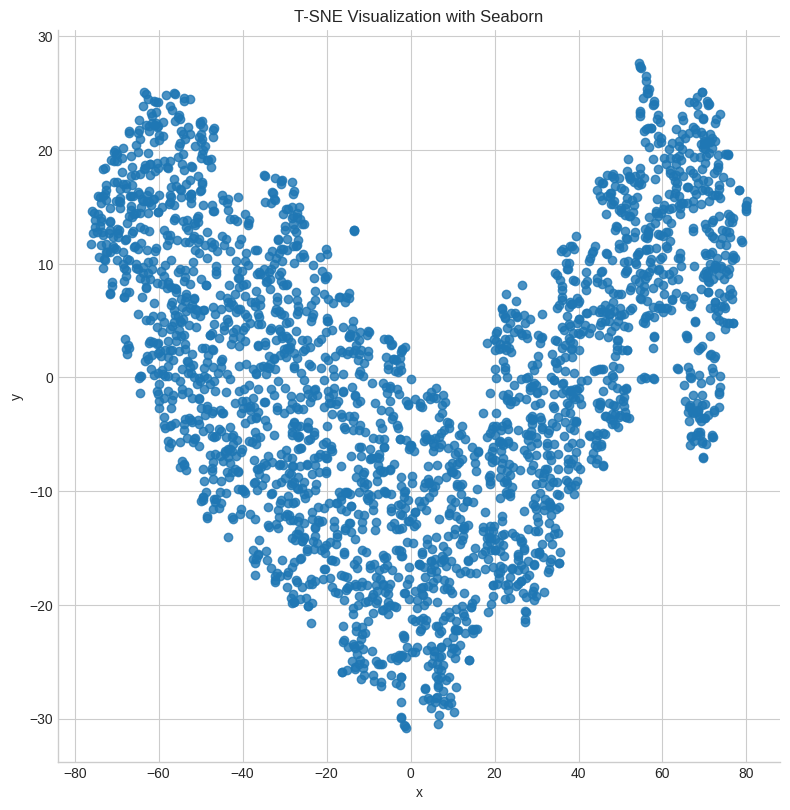

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# lmplot 호출 수정: height 사용
sns.lmplot(x='x', y='y', data=df, fit_reg=False, height=8)  # size → height로 변경
plt.title("T-SNE Visualization with Seaborn")
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [51]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering 설정
ward = AgglomerativeClustering(n_clusters=6, linkage='ward')

# 모델 학습 및 클러스터 예측
predict = ward.fit_predict(df[['x', 'y']])  # 클러스터링은 숫자형 데이터만 사용

# 결과 출력
print(predict)

[3 3 3 ... 0 0 0]


In [52]:
results = df
results['predict'] = predict
results[0:10]

,x,y,word,predict
0,65.708946,3.742196,.,3
1,73.171524,19.588268,이,3
2,75.599258,19.544502,는,3
3,72.406082,20.832069,영화,3
4,73.762390,-0.881465,다,3
5,76.481056,6.907239,고,3
6,69.364250,25.102253,의,3
7,76.569901,13.629923,하,3
8,75.507935,19.650875,을,3
9,69.709213,22.776873,에,3


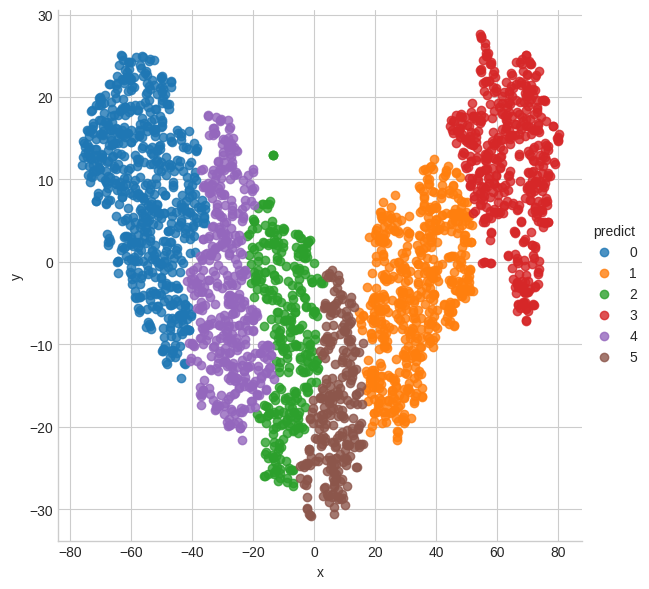

In [57]:
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict', height=6)
plt.show()

#### average

In [59]:
from sklearn.cluster import AgglomerativeClustering

# 숫자형 데이터만 선택 (T-SNE 변환된 결과)
numeric_data = df[['x', 'y']]

# Average linkage로 클러스터링 수행
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(numeric_data)

# 결과 확인
print(predict)

[0 0 0 ... 4 5 4]


In [60]:
results = df
results['predict'] = predict
results[0:10]

,x,y,word,predict
0,65.708946,3.742196,.,0
1,73.171524,19.588268,이,0
2,75.599258,19.544502,는,0
3,72.406082,20.832069,영화,0
4,73.762390,-0.881465,다,0
5,76.481056,6.907239,고,0
6,69.364250,25.102253,의,0
7,76.569901,13.629923,하,0
8,75.507935,19.650875,을,0
9,69.709213,22.776873,에,0


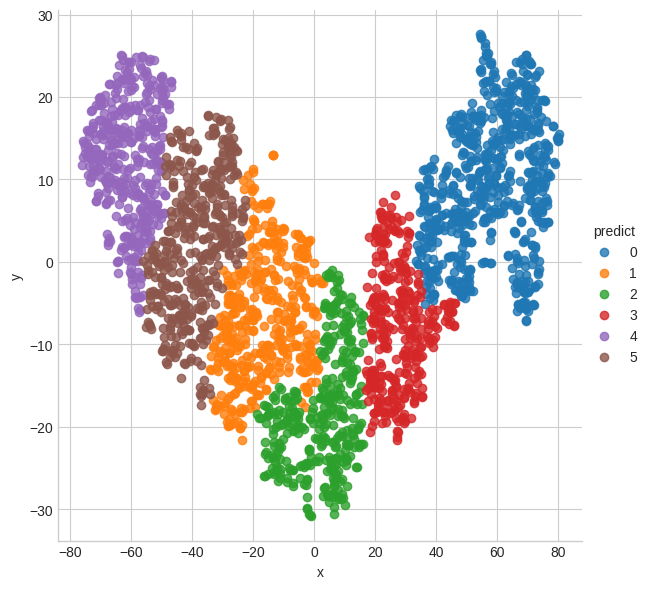

In [61]:
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict', height=6)
plt.show()

#### complete

In [63]:

compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(numeric_data)

# 결과 출력
print(predict)

[4 4 4 ... 0 0 0]


In [64]:
results = df
results['predict'] = predict
results[0:10]

,x,y,word,predict
0,65.708946,3.742196,.,4
1,73.171524,19.588268,이,4
2,75.599258,19.544502,는,4
3,72.406082,20.832069,영화,4
4,73.762390,-0.881465,다,4
5,76.481056,6.907239,고,4
6,69.364250,25.102253,의,4
7,76.569901,13.629923,하,4
8,75.507935,19.650875,을,4
9,69.709213,22.776873,에,4


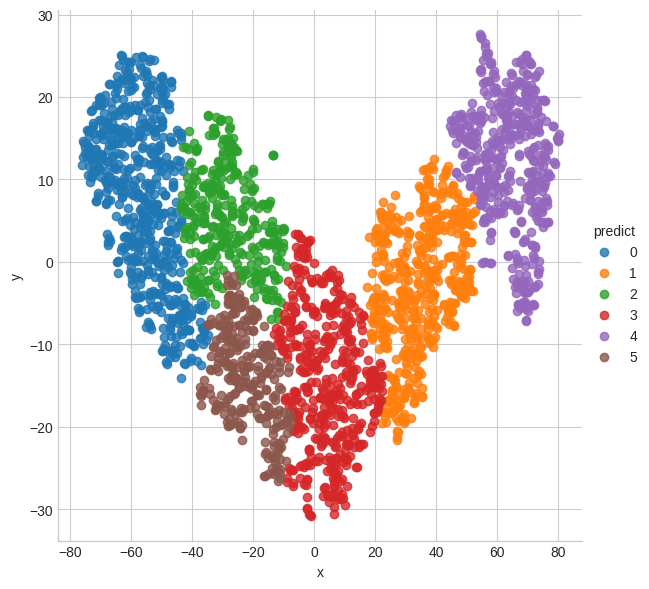

In [65]:
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict', height=6)
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [68]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd

# 숫자형 데이터 선택 (x와 y 좌표만 포함)
numeric_data = df[['x', 'y']]

# 유클리디안 거리 계산
distmatrix = pdist(numeric_data, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))

# 출력 확인
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639
0,0.000000,17.515367,18.642188,18.355256,9.286345,11.227460,21.670563,14.687664,18.684385,19.450477,...,142.055446,129.891673,129.337332,123.150824,105.751773,132.125781,106.006685,138.230978,118.786413,133.704822
1,17.515367,0.000000,2.428129,1.460460,20.478259,13.105781,6.700699,6.859362,2.337249,4.706888,...,149.498774,136.529919,135.512894,129.198041,112.794841,139.437367,113.781828,145.750575,128.129575,141.405961
2,18.642188,2.428129,0.000000,3.442993,20.508394,12.667991,8.352480,5.993696,0.140197,6.718694,...,151.920960,138.957195,137.941023,131.626138,115.218102,141.860237,116.196080,148.171693,130.510439,143.824520
3,18.355256,1.460460,3.442993,0.000000,21.755853,14.508836,5.242825,8.319152,3.319143,3.324960,...,148.805202,135.781103,134.730078,128.409802,112.094667,138.738854,113.138921,145.065017,127.608424,140.737348
4,9.286345,20.478259,20.508394,21.755853,0.000000,8.249549,26.353315,14.780477,20.606405,24.003024,...,150.414069,138.464449,138.008403,131.859131,114.293105,140.537281,114.370411,146.577533,126.644562,142.013595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,132.125781,139.437367,141.860237,138.738854,140.537281,142.707485,136.020269,142.674826,141.774081,136.174537,...,10.079226,6.195336,10.003619,14.038342,26.644200,0.000000,26.187644,6.480067,21.068020,3.803444
2636,106.006685,113.781828,116.196080,113.138921,114.370411,116.655815,110.639876,116.797296,116.114493,110.675305,...,36.051137,24.904499,25.575210,20.641238,5.090277,26.187644,0.000000,32.224294,18.097920,27.723886
2637,138.230978,145.750575,148.171693,145.065017,146.577533,148.867442,142.388104,148.920988,148.086659,142.521233,...,3.854821,11.600097,14.915414,19.999152,32.995501,6.480067,32.224294,0.000000,24.330055,4.724424
2638,118.786413,128.129575,130.510439,127.608424,126.644562,129.756248,125.528696,130.557496,130.439421,125.355970,...,27.832937,24.316195,27.331797,26.307574,22.360437,21.068020,18.097920,24.330055,0.000000,19.872833


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

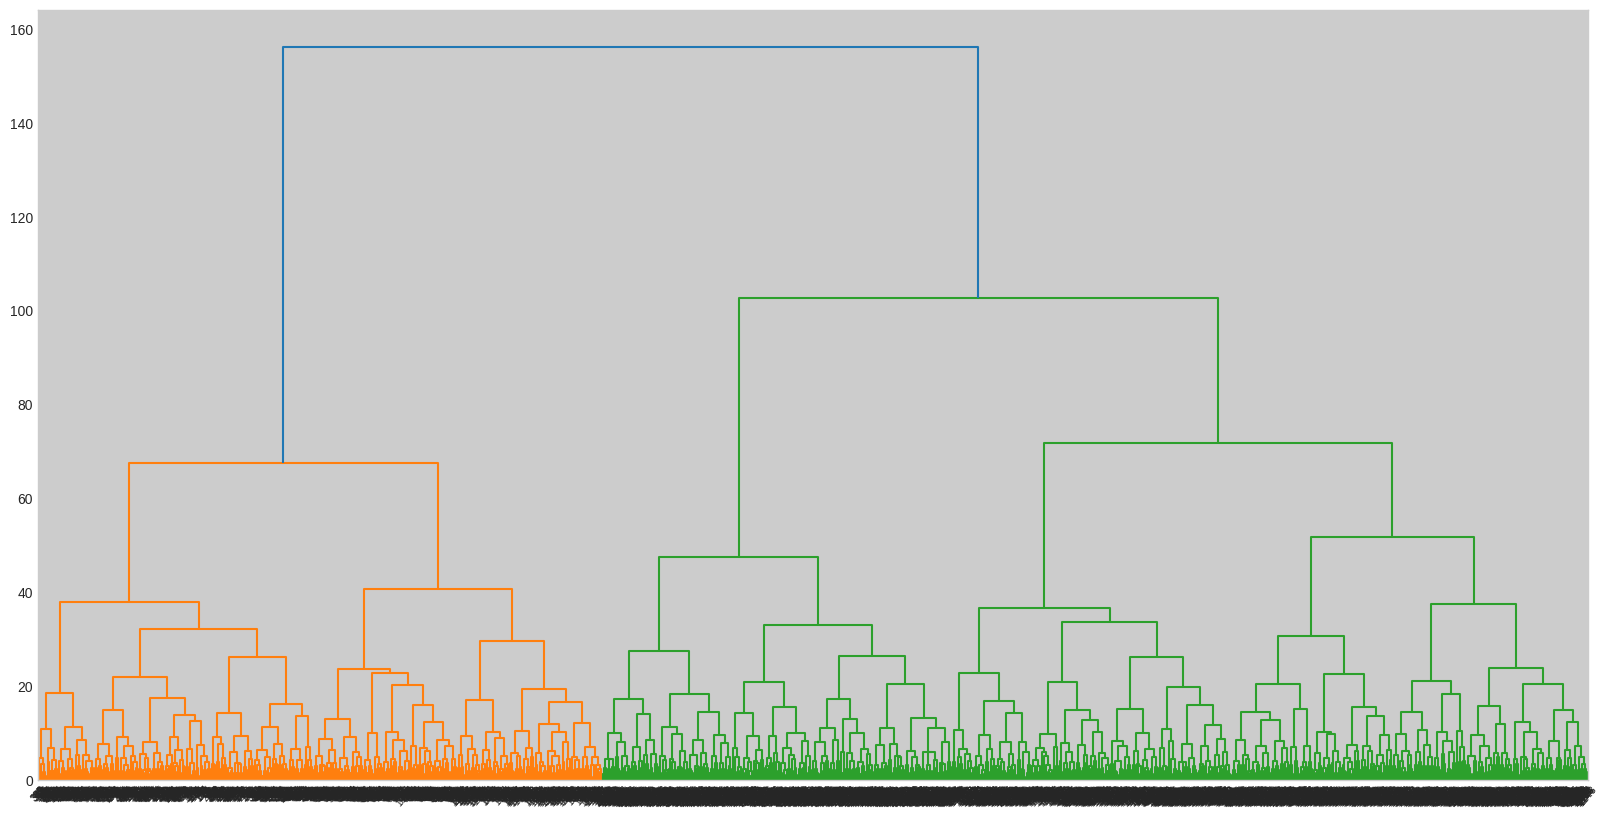

In [69]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

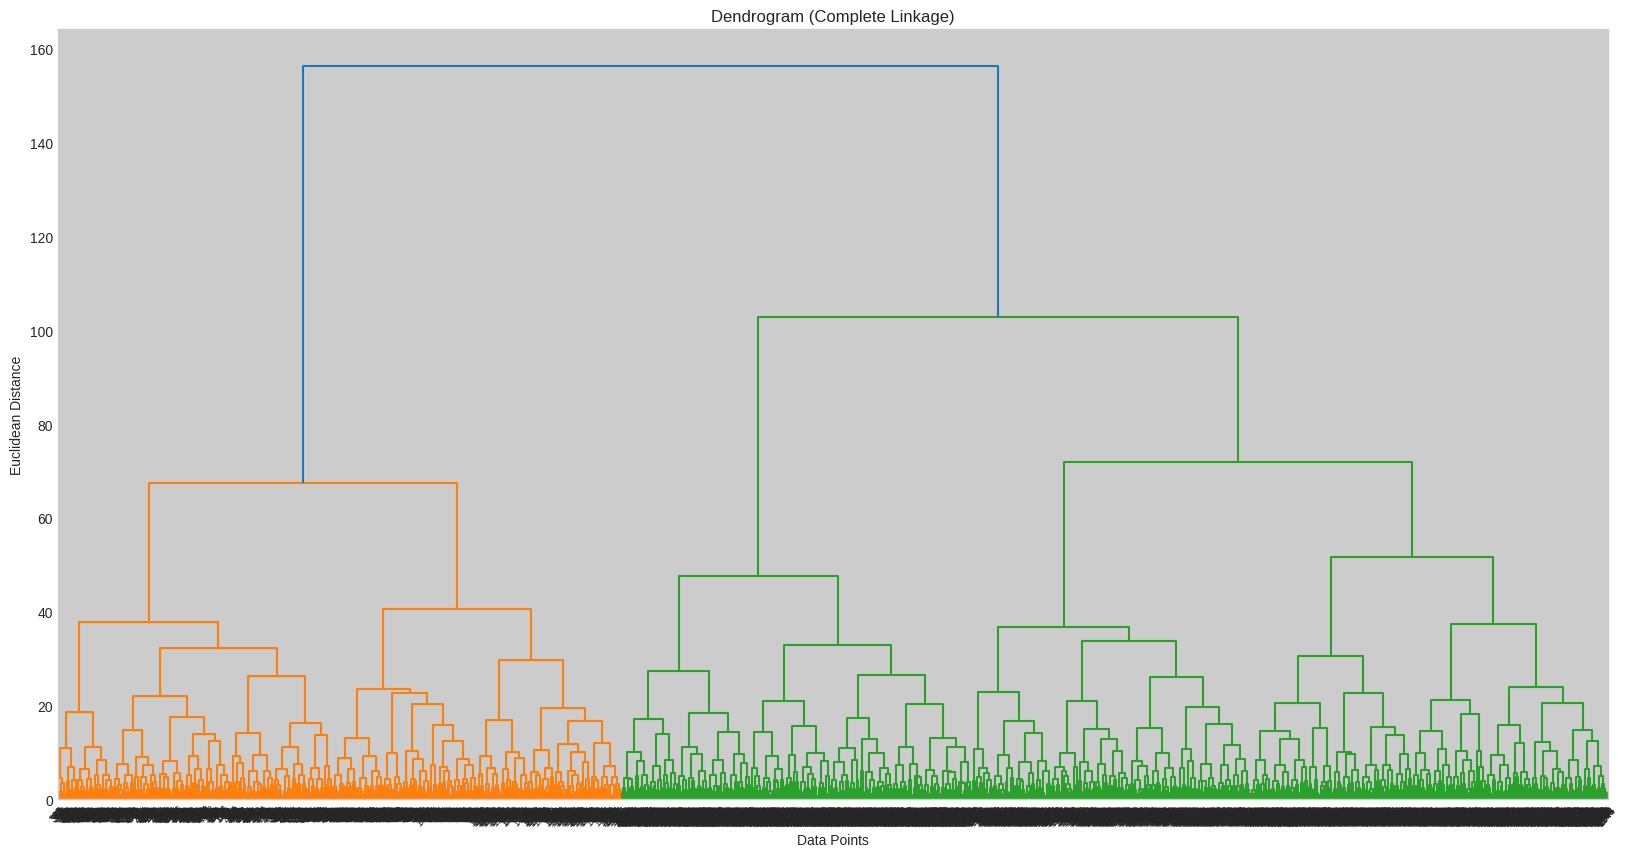

In [71]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

numeric_data = df[['x', 'y']]

# 계층적 클러스터링 수행
mergings = linkage(numeric_data, method='complete')

# 덴드로그램 시각화
plt.figure(figsize=(20, 10))
dendrogram(mergings,
           leaf_rotation=50,
           leaf_font_size=7)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [73]:
from sklearn.cluster import KMeans

# 숫자형 데이터 선택
numeric_data = df.select_dtypes(include=['float64', 'int64']).dropna()

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
predict = kmeans.fit_predict(numeric_data)

# 결과 출력
print(predict)

[2 2 2 ... 1 1 1]


In [74]:
results = df
results['predict'] = predict
results[0:10]

,x,y,word,predict
0,65.708946,3.742196,.,2
1,73.171524,19.588268,이,2
2,75.599258,19.544502,는,2
3,72.406082,20.832069,영화,2
4,73.762390,-0.881465,다,2
5,76.481056,6.907239,고,2
6,69.364250,25.102253,의,2
7,76.569901,13.629923,하,2
8,75.507935,19.650875,을,2
9,69.709213,22.776873,에,2


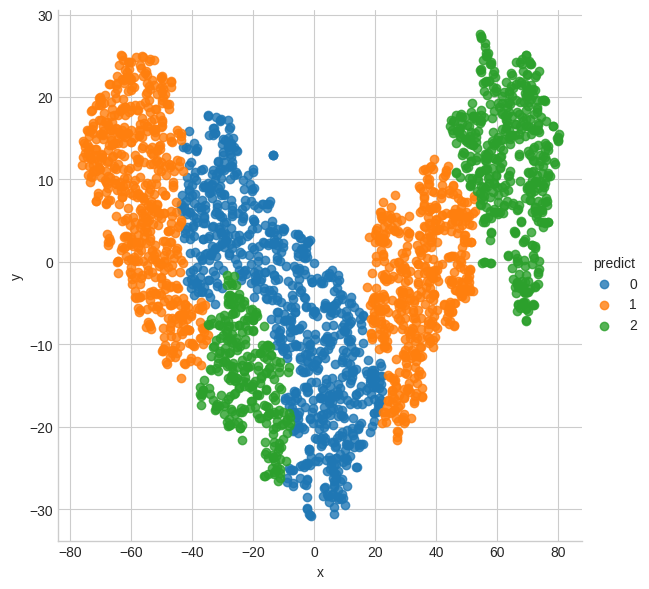

In [75]:
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict', height=6)
plt.show()

### 클러스터 개수 6

In [76]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(numeric_data)

predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [77]:
results = df
results['predict'] = predict
results[0:10]

,x,y,word,predict
0,65.708946,3.742196,.,1
1,73.171524,19.588268,이,1
2,75.599258,19.544502,는,1
3,72.406082,20.832069,영화,1
4,73.762390,-0.881465,다,1
5,76.481056,6.907239,고,1
6,69.364250,25.102253,의,1
7,76.569901,13.629923,하,1
8,75.507935,19.650875,을,1
9,69.709213,22.776873,에,1


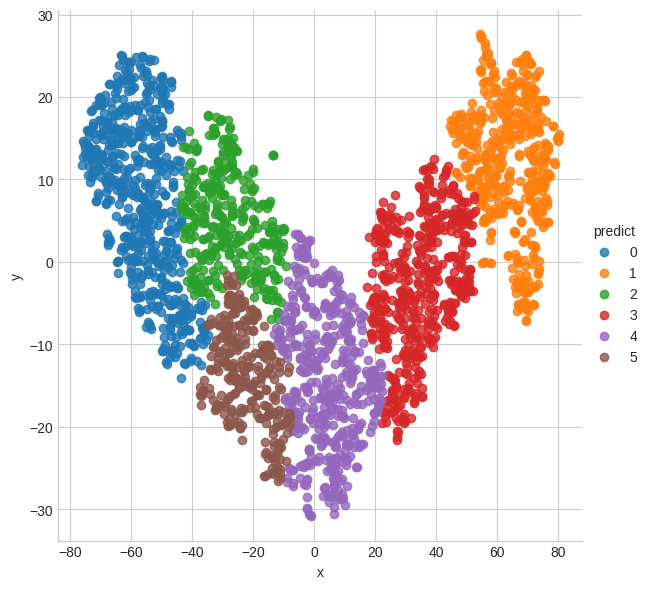

In [78]:
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict', height=6)
plt.show()